# 第六章 高阶统计模型

## 6.1 Theta模型

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
# 创建一个测试数据集
np.random.seed(0)
time = np.arange(100)
data = 0.5 * time + np.random.normal(size=time.size)

In [3]:
# 将数据转换为pandas Series
series = pd.Series(data, index=pd.date_range('20230101', periods=time.size))

In [4]:
# 应用Theta模型
# 这里我们使用Holt-Winters模型作为Theta模型的一种实现
# 注意：Theta模型并没有直接实现在statsmodels中，但可以通过调整Holt-Winters模型参数来近似
model = ExponentialSmoothing(series, trend='additive', seasonal=None, damped_trend=True)
fit = model.fit(optimized=True)

In [5]:
# 预测未来10个数据点
forecast = fit.forecast(10)

# 打印预测结果
print(forecast)

2023-04-11    50.614961
2023-04-12    51.127247
2023-04-13    51.636971
2023-04-14    52.144146
2023-04-15    52.648785
2023-04-16    53.150902
2023-04-17    53.650507
2023-04-18    54.147615
2023-04-19    54.642237
2023-04-20    55.134386
Freq: D, dtype: float64


## 3.2 TBATS模型

In [ ]:
! pip3 install tbats

In [7]:
import numpy as np
import pandas as pd
from tbats import TBATS

In [8]:
# 生成测试数据，这里我们创建一个简单的季节性模式数据
np.random.seed(42)
n_periods = 365
seasonal_effect = np.sin(np.arange(n_periods) * 2 * np.pi / 7)  # 每周的季节性
trend_effect = np.arange(n_periods) / n_periods  # 线性趋势
noise = np.random.normal(0, 0.1, n_periods)  # 随机噪声
data = 10 + seasonal_effect + trend_effect + noise

In [9]:
# 将数据转换为pandas Series
time_series_data = pd.Series(data, index=pd.date_range(start='2020-01-01', periods=n_periods, freq='D'))


In [10]:
# 拟合TBATS模型
estimator = TBATS(seasonal_periods=[7])  # 假设数据具有周期为7的季节性
model = estimator.fit(time_series_data)

In [11]:
# 进行预测
n_forecast = 14  # 预测未来14天
forecast = model.forecast(steps=n_forecast)


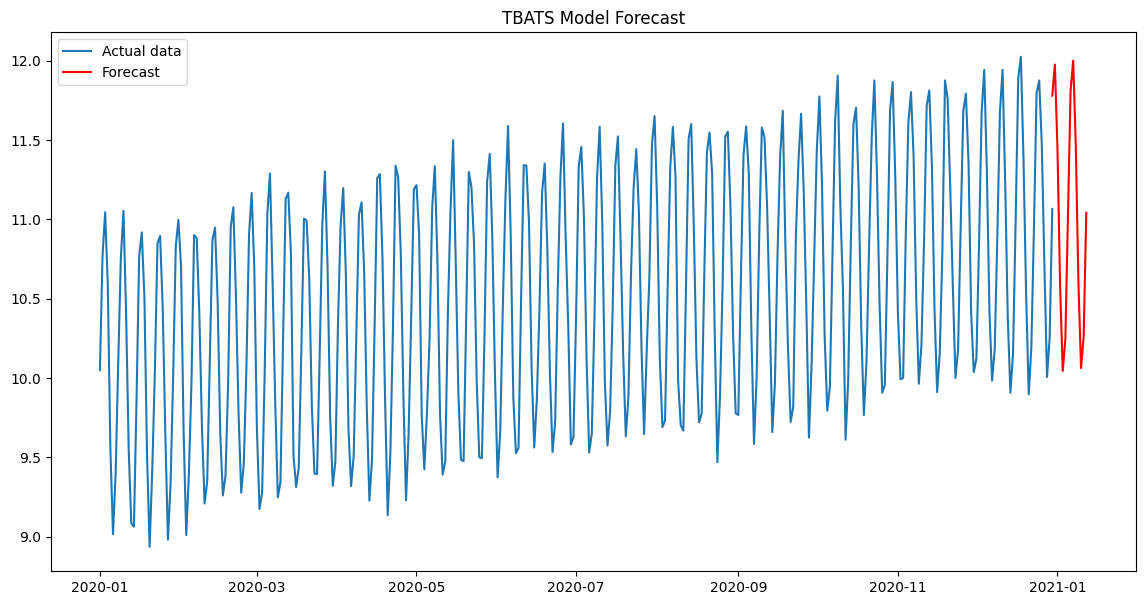

In [12]:
# 可视化结果
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(time_series_data, label='Actual data')
plt.plot(pd.date_range(start=time_series_data.index[-1], periods=n_forecast, freq='D'), forecast, label='Forecast', color='red')
plt.title('TBATS Model Forecast')
plt.legend()
plt.show()

请注意，TBATS模型的参数选择和模型的性能将高度依赖于具体的数据集。在实际应用中，可能需要根据数据的特性调整季节性周期、Box-Cox变换参数等。

## 3.3 Boosting和Bagging

### 3.3.1 MBB

In [13]:
import numpy as np

In [14]:
class MovingBlockBootstrap:
    def __init__(self, block_length):
        self.block_length = block_length

    def generate_blocks(self, data):
        n = len(data)
        blocks = []
        for i in range(n - self.block_length + 1):
            blocks.append(data[i:i+self.block_length])
        return blocks

    def resample(self, data):
        blocks = self.generate_blocks(data)
        num_blocks = len(data) // self.block_length
        bootstrap_sample = []
        for _ in range(num_blocks):
            block = blocks[np.random.choice(len(blocks))]
            bootstrap_sample.extend(block)
        return np.array(bootstrap_sample)

In [15]:
# 生成测试数据
np.random.seed(0)  # 设置随机种子以获得可重现的结果
test_data = np.random.normal(size=100)  # 假设我们有100个数据点的时间序列

In [16]:
# 实例化MBB模型
mbb = MovingBlockBootstrap(block_length=5)

In [17]:
# 使用MBB生成bootstrap样本
bootstrap_sample = mbb.resample(test_data)

In [18]:
# 打印结果
print("原始数据:")
print(test_data)
print("\nBootstrap样本:")
print(bootstrap_sample)

原始数据:
[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.16514984  0.90082

请注意，MBB方法不保证生成的样本长度与原始数据长度完全相同，因为原始数据长度可能不是块长度的整数倍。在实际应用中，可能需要对此进行适当的调整。

### 3.3.2 CBB

In [19]:
import numpy as np
import pandas as pd

In [20]:
def generate_test_data(n=100):
    # 生成一个简单的时间序列数据，可以是股票价格、温度等
    np.random.seed(0)  # 确保结果可重复
    data = np.cumsum(np.random.randn(n))  # 随机漫步数据
    dates = pd.date_range('20230101', periods=n)
    return pd.Series(data, index=dates)

In [21]:
# Circular Block Bootstrap函数
def circular_block_bootstrap(series, block_size, n_iter=1000):
    # series: 时间序列数据
    # block_size: 块的大小
    # n_iter: bootstrap迭代次数
    n = len(series)
    samples = []
    for _ in range(n_iter):
        # 随机选择一个起点
        start_idx = np.random.randint(0, n)
        sample = []
        while len(sample) < n:
            # 计算块的结束位置，如果到达末尾则循环回到开始
            end_idx = min(start_idx + block_size, n)
            sample.extend(series[start_idx:end_idx])
            start_idx = (start_idx + block_size) % n
        samples.append(sample[:n])  # 确保样本大小与原始数据相同
    return samples


In [22]:
# 生成测试数据
test_data = generate_test_data(n=100)    

In [23]:
# 设置块大小
block_size = 5

In [24]:
# 执行Circular Block Bootstrap
bootstrap_samples = circular_block_bootstrap(test_data, block_size, n_iter=1000)

In [25]:
# 输出第一个bootstrap样本的前10个数据点
print(bootstrap_samples[0][:10])

[12.93101761556421, 10.950221147340283, 10.60230899801413, 10.758657967118111, 11.988948647845833, 13.191328496630245, 12.804001679222292, 12.501698928646956, 11.453145963579864, 10.033128026400888]


请注意，这个例子只是为了演示如何实现Circular Block Bootstrap，你可以根据你的具体需求调整代码，例如，通过并行化来加速bootstrap过程，或者将bootstrap样本用于进一步的统计分析。

### 3.3.3 Bagging

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox#, inv_boxcox
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.utils import resample

In [3]:
# 生成测试数据
np.random.seed(0)
n_periods = 120
trend = np.linspace(10, 30, n_periods)
seasonal = 10 + np.sin(np.linspace(0, 2 * np.pi, n_periods))
noise = np.random.normal(size=n_periods, scale=2)
data = trend + seasonal + noise


In [4]:
# 步骤1：Box-Cox变换
data_transformed, lmbda = boxcox(data)

In [6]:
# 步骤2：时间序列分解
stl = STL(data_transformed, period=13)
result = stl.fit()
T = result.trend
S = result.seasonal
R = result.resid

In [7]:
# 步骤3：Bootstrap
b = 1000  # 假设我们生成1000个bootstrap样本
bootstrapped_samples = []

for i in range(b):
    R_star = resample(R, replace=True)  # MBB法
    Y_star = T + S + R_star
    bootstrapped_samples.append(Y_star)


In [ ]:
# 步骤4：逆Box-Cox变换
Y_tilde_samples = [inv_boxcox(sample, lmbda) for sample in bootstrapped_samples]


In [ ]:
# 步骤5：预测
forecast_horizon = 10  # 预测未来10个时间点
forecasts = []

for Y_tilde in Y_tilde_samples:
    model = ExponentialSmoothing(Y_tilde, trend='add', seasonal='add', seasonal_periods=13)
    model_fit = model.fit()
    forecast = model_fit.forecast(forecast_horizon)
    forecasts.append(forecast)

In [ ]:
# 步骤6：组合
combined_forecast = np.mean(forecasts, axis=0)

## 3.4 Prophet

In [3]:
import pandas as pd
from gluonts.dataset.common import ListDataset
from gluonts.ext.prophet import ProphetPredictor
from gluonts.evaluation import Evaluator
from gluonts.evaluation.backtest import make_evaluation_predictions

In [4]:
# 生成一些测试数据
date_rng = pd.date_range(start='2020-01-01', end='2020-12-31', freq='D')
series = pd.Series(data=range(len(date_rng)), index=date_rng)
df = pd.DataFrame(series, columns=['value'])
df.reset_index(inplace=True)
df.columns = ['ds', 'y']


In [5]:
# 将数据转换为GluonTS ListDataset
training_data = ListDataset(
    [{'start': df.ds.iloc[0], 'target': df.y.values[:-30]}],
    freq='D'
)


In [7]:
# 创建Prophet预测模型
predictor = ProphetPredictor( prediction_length=30)

In [8]:
# 使用Prophet模型进行预测
forecast_it, ts_it = make_evaluation_predictions(
    dataset=training_data,  # 测试数据
    predictor=predictor,  # 使用的预测模型
    num_samples=100,  # 预测样本的数量
)

forecasts = list(forecast_it)
tss = list(ts_it)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [9]:
# 评估预测结果
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(training_data))

# 打印评估指标
print("Aggregated metrics:")
print(agg_metrics)


Running evaluation: 100%|██████████| 1/1 [00:00<00:00,  7.71it/s]


Aggregated metrics:
{'MSE': 7.031132591794226e-08, 'abs_error': 0.008634125453966135, 'abs_target_sum': 9615.0, 'abs_target_mean': 320.5, 'seasonal_error': 1.0, 'MASE': 0.00028780418179887116, 'MAPE': 8.978998626681596e-07, 'sMAPE': 8.978993683998498e-07, 'MSIS': 0.006404255893632656, 'num_masked_target_values': 0.0, 'QuantileLoss[0.1]': 0.011481178423980509, 'Coverage[0.1]': 0.0, 'QuantileLoss[0.5]': 0.008634125453966135, 'Coverage[0.5]': 0.8666666666666667, 'QuantileLoss[0.9]': 0.013729293913536365, 'Coverage[0.9]': 1.0, 'RMSE': 0.00026516282906535423, 'NRMSE': 8.273411203287183e-07, 'ND': 8.979849666111424e-07, 'wQuantileLoss[0.1]': 1.1940903197067612e-06, 'wQuantileLoss[0.5]': 8.979849666111424e-07, 'wQuantileLoss[0.9]': 1.427903683155108e-06, 'mean_absolute_QuantileLoss': 0.011281532597161003, 'mean_wQuantileLoss': 1.1733263231576705e-06, 'MAE_Coverage': 0.5, 'OWA': nan}


<Figure size 1200x500 with 0 Axes>

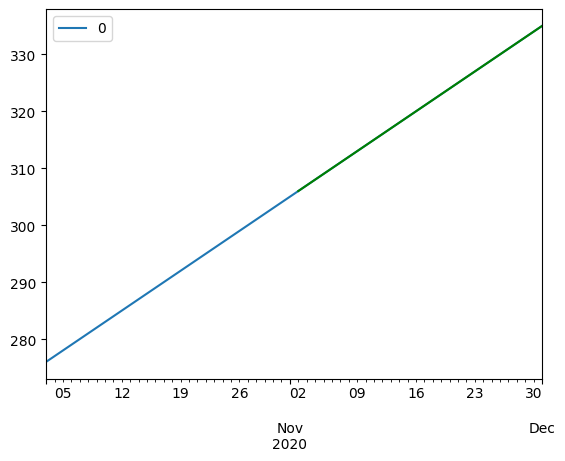

In [10]:
# 可视化结果
import matplotlib.pyplot as plt

for target, forecast in zip(tss, forecasts):
    plt.figure(figsize=(12, 5))
    target[-2 * predictor.prediction_length:].plot(label='target')
    forecast.plot(color='g')
    plt.legend()
    plt.show()